In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import scipy.optimize as sp

from matplotlib import pyplot as plt

In [2]:

def calculate_sole_b_uncertainty(series, u_b, u_be=0):
    return np.sqrt(series/series*((u_b**2)/3 + (u_be**2)/3)) #returns a number

    
def calculate_sanwa_uncertainties(series, c1, c2, zakres):
    return (c1*series + c2*zakres)/np.sqrt(3)

In [15]:
T_s = pd.read_csv('in/T_s.csv')[1:]
T_m = pd.read_csv('in/T_m.csv')[1:]
R = pd.read_csv('in/R.csv')[1:]

# T_s = T_s[1:]
# T_m = T_m[1:]
# R = R[1:]



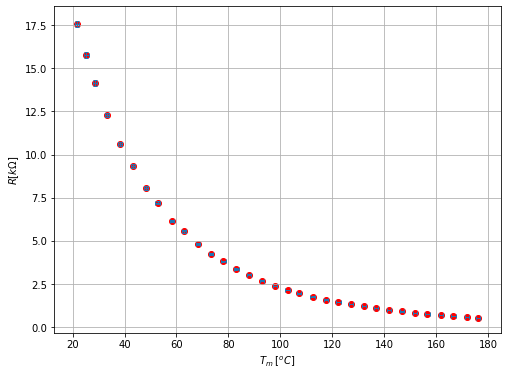

In [16]:
fig, ax = plt.subplots(1,1, figsize =(8,6))

dotcolor = 'red'
ax.scatter(T_m['T'],R['R']/1000, color = dotcolor)
ax.errorbar(T_m['T'],R['R']/1000, xerr=T_m['u'], yerr=R['u']/1000, elinewidth=1, capthick=1, capsize=2, fmt='none')

ax.set_xlabel(r'$T_m \; [^oC]$')
ax.set_ylabel(r'$R[k\Omega]$')

plt.grid()
plt.savefig('out/wyk_Tm_od_R.jpg', dpi = 350)
plt.show()

ln R od 1/T
do tego linefit


a =  -0.022404212786675436
b =  10.074427874418898


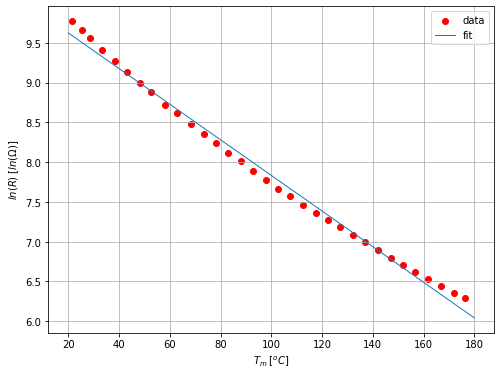

In [17]:

fig, ax = plt.subplots(1,1, figsize =(8,6))

dotcolor = 'red'

R['logR'] = np.log(R['R'])

ax.scatter(T_m['T'],R['logR'], color = dotcolor, label = 'data')

fit = np.polyfit(T_m['T'], R['logR'], deg=1)

x_fit = np.arange(20,180,0.1)
y_fit = fit[1] + x_fit*fit[0]
plt.plot(x_fit, y_fit, linewidth=1, label = 'fit')
print('a = ', fit[0])
print('b = ', fit[1])

# ax.errorbar(1/T_m['T'],np.log(R['R']), xerr=T_m['u'], yerr=R['u']/1000, elinewidth=1, capthick=1, capsize=2, fmt='none')

ax.set_xlabel(r'$T_m \; [^oC]$')
ax.set_ylabel(r'$ln(R) \; [ln(\Omega)]$')


plt.grid()
plt.legend()
plt.savefig('out/wyk_Tm_od_lnR_linfit.jpg', dpi = 350)
plt.show()

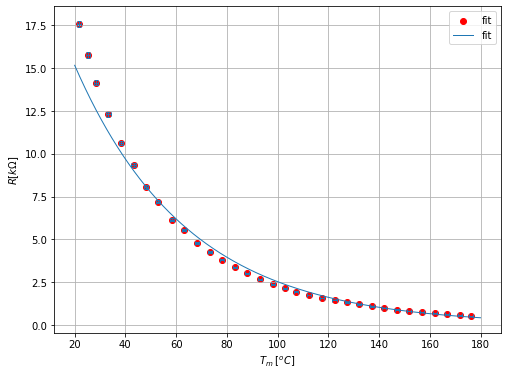

In [18]:
fig, ax = plt.subplots(1,1, figsize =(8,6))

dotcolor = 'red'
ax.scatter(T_m['T'],R['R']/1000, color = dotcolor, label = 'fit')
ax.errorbar(T_m['T'],R['R']/1000, xerr=T_m['u'], yerr=R['u']/1000, elinewidth=1, capthick=1, capsize=2, fmt='none')

ax.set_xlabel(r'$T_m \; [^oC]$')
ax.set_ylabel(r'$R[k\Omega]$')

plt.plot(x_fit, np.exp(y_fit)/1000, linewidth=1, label='fit')

plt.grid()
plt.legend()

plt.savefig('out/wyk_Tm_od_R_expfit.jpg', dpi = 350)
plt.show()